<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/PROJECT_ONE_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction to Tesla(TSLA) Stock Prices - Time Series Data**

Title and brief description of dataset: Stock price data for TESLA, with open, high, low, close, adjusted close, and volume information for each trading day from 3rd January 2017 to 24th April 2023

Source: The data has been taken from Yahoo Finance, manually downloaded from the repository 

Variables/Columns:

Date: the date of the trading day (data type: date)
Open: the opening price of the stock on that day (data type: float)
High: the highest price the stock reached on that day (data type: float)
Low: the lowest price the stock reached on that day (data type: float)
Close: the closing price of the stock on that day (data type: float)
Adj Close: the adjusted closing price of the stock on that day (data type: float)
Volume: the volume of shares traded on that day (data type: integer)

Key insights and analysis: Just from the onset,we can see that the stock's opening, closing, high, and low prices varied each day. We can also see that the volume of shares traded varied from day to day.

Why TSLA stock price? 
It has seasonality and trends that are suitable for applying the requirements of project work. As per our analysis, we have observed that there is indeed seasonality and trend in the stock price and that has allowed us to learn all the concepts taught int the course so far. 

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500
...,...,...,...,...,...,...,...
1582,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
1583,2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
1584,2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800
1585,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123352300


# PART I: *Modeling* and Forecasting Trend

In [ ]:
df=df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500
...,...,...,...,...,...,...
2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800


In [ ]:
df=df['Adj Close']
df

Date
2017-01-03     14.466000
2017-01-04     15.132667
2017-01-05     15.116667
2017-01-06     15.267333
2017-01-09     15.418667
                 ...    
2023-04-18    184.309998
2023-04-19    180.589996
2023-04-20    162.990005
2023-04-21    165.080002
2023-04-24    162.550003
Name: Adj Close, Length: 1587, dtype: float64

# (a) Show a time-series plot of your data

Text(0.5, 1.0, 'Time series plot of TSLA Stock Price')

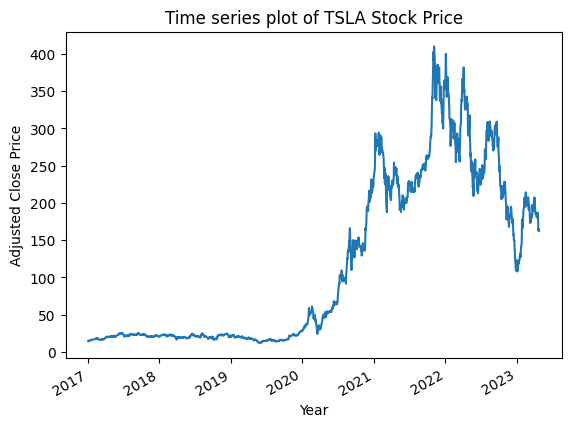

In [ ]:
df.plot()
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.title('Time series plot of TSLA Stock Price')

# b) Does your plot in (a) suggest that the data are covariance stationary? Explain your answer

As the stock price does not seem to have constant mean and variance over time, it does not have covariance-stationarity. If we look at the plot, we can observe that till 2020, stock price seems to hover around 20 to 25. After that, it increased a lot and is very volatile. 

In [ ]:
result = adfuller(df)
result

(-1.3612754654613868,
 0.600694001204325,
 24,
 1562,
 {'1%': -3.434543392468286,
  '5%': -2.863392129986099,
  '10%': -2.567756042468289},
 10201.096737020242)

From the ADF test output, we can see that the test statistic is less than the critical value at any level of significance, and the p-value is greater than 0.05. This suggests that we cannot reject the null hypothesis that the time series is non-stationary. 

# (c) Plot and discuss the ACF and PACF of your data

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


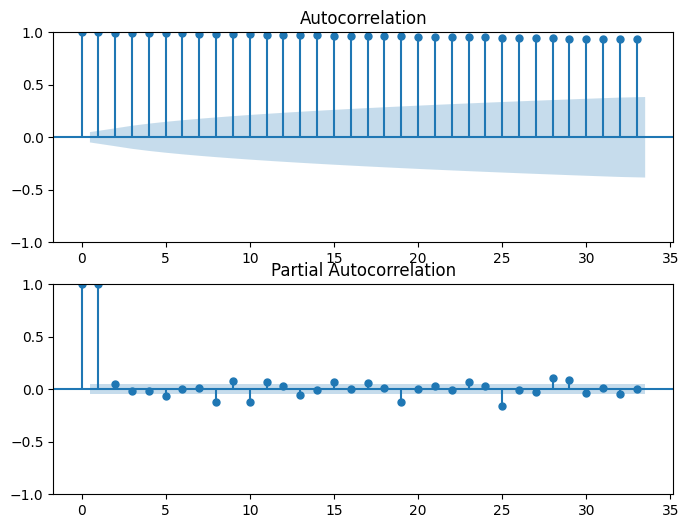

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1])
plt.show()

As we can observe from the ACF plot, it is not decaying over time and autocorrelations over multiple lags are high. It means there is seasonal pattern in the stock price. There is two significant lags in the PACF plot. This means only recent values have a strong prediction power on the stock price. For such type of dataset, a model that takes into account the seasonal pattern would be best. This plots suggest that the data is non-stationary as evidenced by ADFuller Test. 

# (d) Fit a linear and nonlinear (e.g., polynomial, exponential, quadratic + periodic, etc.) model to your series. In one window, show both figures of the original times series plot with the respective fit

Fit the Linear Model 

In [ ]:
X = np.arange(len(df)).reshape(-1, 1)
y = df.values.reshape(-1, 1)
linear_reg = LinearRegression().fit(X, y)
y_pred_linear = linear_reg.predict(X)

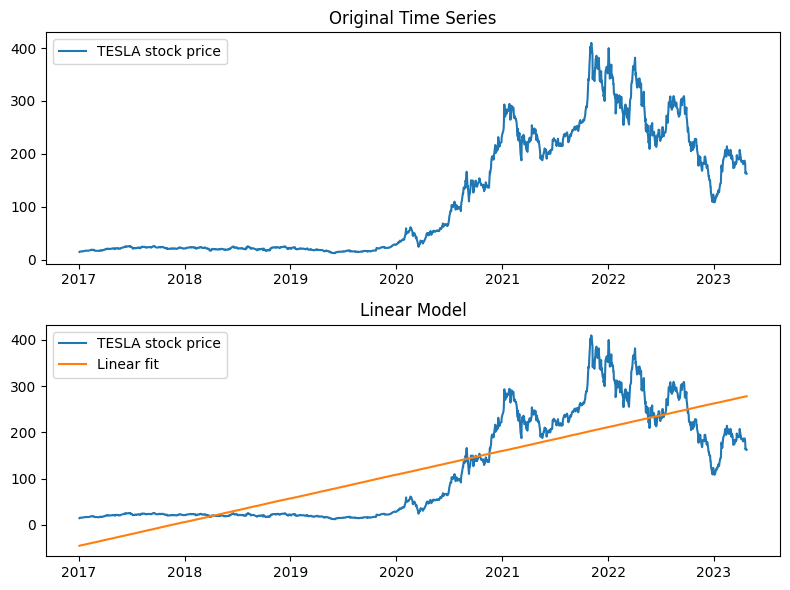

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the original time series
ax1.plot(df, label='TESLA stock price')
ax1.legend()
ax1.set_title('Original Time Series')

# Plot the linear fit
ax2.plot(df, label='TESLA stock price')
ax2.plot(df.index, y_pred_linear, label='Linear fit')
ax2.legend()
ax2.set_title('Linear Model')

plt.tight_layout()
plt.show()

As we observe from the plot, linear model is not fitting well. Before running any model, it would be better to employ some transformations on the data to have a suitable fit with the data. Let's look at the polynomial fit and how well it is going to perform. 

Fit a polynomial Model 

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
linear_reg_2 = LinearRegression().fit(X_poly, y)
y_pred_poly = linear_reg_2.predict(poly_reg.fit_transform(X))

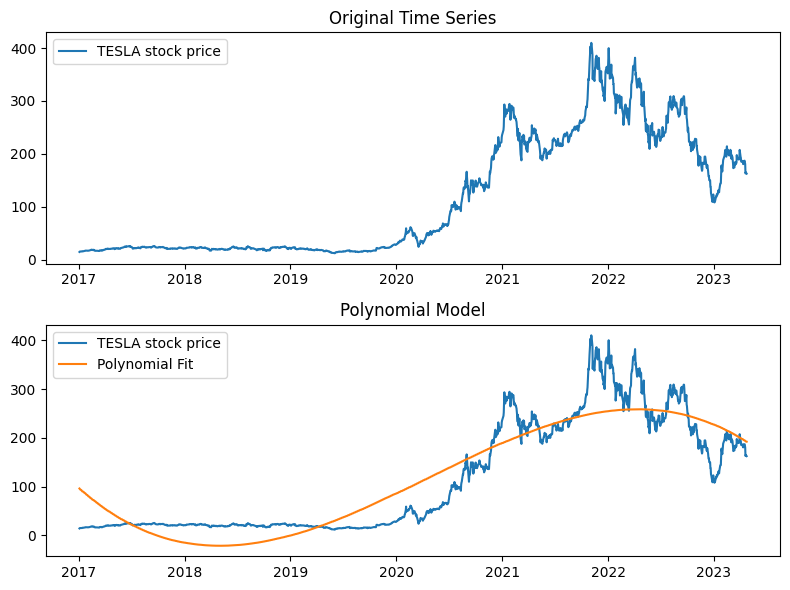

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the original time series
ax1.plot(df, label='TESLA stock price')
ax1.legend()
ax1.set_title('Original Time Series')

# Plot the linear fit
ax2.plot(df, label='TESLA stock price')
ax2.plot(df.index, y_pred_poly, label='Polynomial Fit')
ax2.legend()
ax2.set_title('Polynomial Model')

plt.tight_layout()
plt.show()

As we can see from the plot, polynomial fit is better than the linear fit as the fitted line is more closer to real observations. 

# (e) For each model, plot the respective residuals vs. fitted values and discuss your observations

In [ ]:
y_pred_linear.shape

(1587, 1)

In [ ]:
residuals_linear.shape

(1587, 1587)

In [ ]:
residuals_linear = 

AttributeError: ignored

In [ ]:
residuals_linear.shape

(1587,)

ValueError: ignored

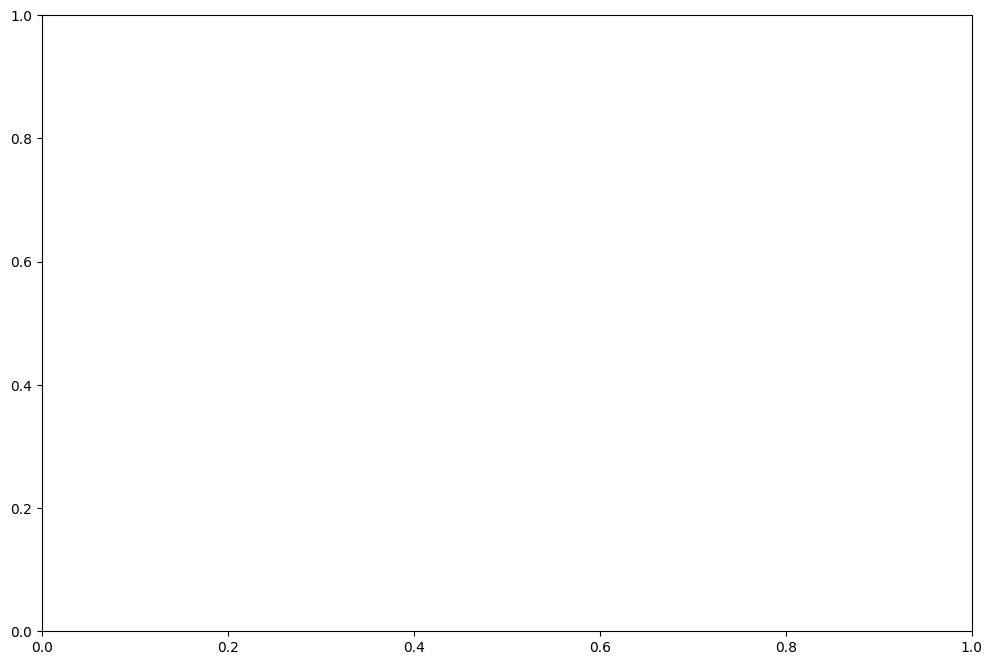

In [ ]:
# Calculate residuals
residuals_linear = y - y_pred_linear

# Plot residuals vs. fitted values
plt.figure(figsize=(12,8))
plt.scatter(y_pred_linear, residuals_linear)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values - Linear Model')
plt.show()

From the plot, we see that the residuals are fitting with the fitted values initially but later on, there are some deviations. This means that the linear model is quite a good one to predict the stock prices. 

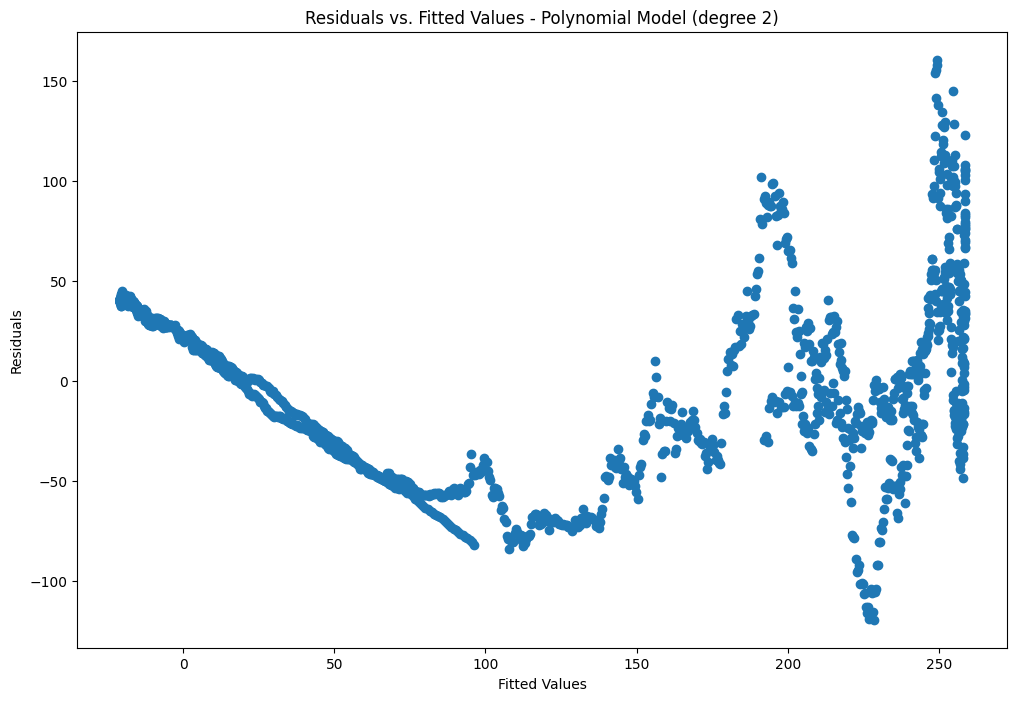

In [ ]:
# Calculate residuals
residuals_poly = y - y_pred_poly

# Plot residuals vs. fitted values
plt.figure(figsize=(12,8))
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values - Polynomial Model (degree 2)')
plt.show()

Here we can observe that the residuals don't follow the fitted values and there are deviations from the observed values. In such case, the model does not perform well. Let's look at other observations before any conclusive remarks. 

# f) For each model, plot a histogram of the residuals and discuss your observations

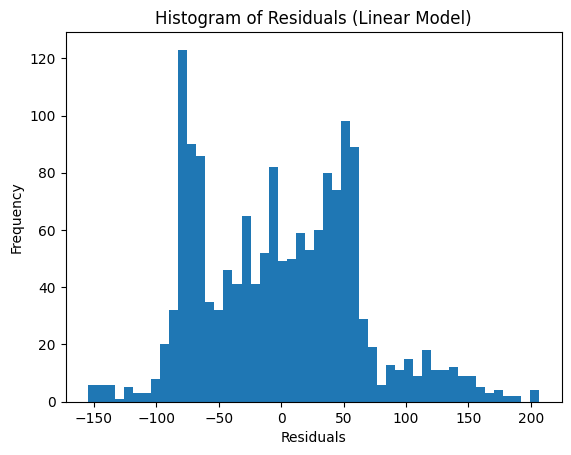

In [ ]:
plt.hist(residuals_linear, bins=50)
plt.title('Histogram of Residuals (Linear Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

As we can see from the historgram, there are outliers in the stock price dataset. This is not completely normally distributed. 

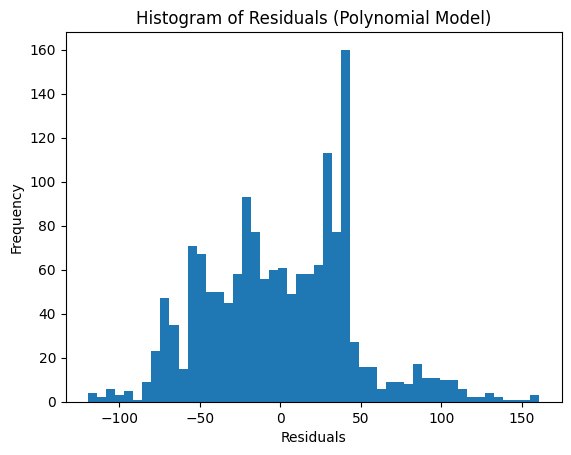

In [ ]:
plt.hist(residuals_poly, bins=50)
plt.title('Histogram of Residuals (Polynomial Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The observation is almost similar in case of polynomial fit as well. There are many outliers and the dataset is not normally distributed. 

# (g) For each model, discuss the associated diagnostic statistics (R2 , t−distribution, F−distribution, etc.)

In [ ]:
# Fit the linear model
model_linear = sm.OLS(y, X).fit()

# Print the diagnostic statistics
print("Linear model:")
print("R-squared:", model_linear.rsquared)
print("t-values:\n", model_linear.tvalues)
print("p-values:\n", model_linear.pvalues)
print("F-statistic:", model_linear.fvalue)
print("p-value:", model_linear.f_pvalue)

Linear model:
R-squared: 0.8245983193290047
t-values:
 [86.34872692]
p-values:
 [0.]
F-statistic: 7456.102640823008
p-value: 0.0


In [ ]:
# Fit the polynomial model
model_poly = sm.OLS(y, X_poly).fit()

# Print the diagnostic statistics
print("Polynomial model:")
print("R-squared:", model_poly.rsquared)
print("t-values:\n", model_poly.tvalues)
print("p-values:\n", model_poly.pvalues)
print("F-statistic:", model_poly.fvalue)
print("p-value:", model_poly.f_pvalue)

Polynomial model:
R-squared: 0.8368923823149198
t-values:
 [ 20.96443506 -30.45156552  38.80471793 -37.52305362]
p-values:
 [2.56863798e-086 1.05809336e-160 4.76099853e-232 5.60060791e-221]
F-statistic: 2707.4162445769903
p-value: 0.0


We examined the TSLA stock price data and fit both a linear and polynomial model to the data. 

The linear model had an R-squared value of 0.82, indicating that approximately 82% of the variance in the data can be explained by the model. The t-value was 86.35 with a p-value of 0, indicating that the slope of the line is significantly different from 0. The F-statistic was 7456.10 with a p-value of 0, indicating that the model as a whole is significant.

The polynomial model had a slightly higher R-squared value of 0.84, indicating that approximately 84% of the variance in the data can be explained by the model. The t-values for the four coefficients were 20.96, -30.45, 38.80, and -37.52, with all corresponding p-values being very close to 0, indicating that all four coefficients are significantly different from 0. The F-statistic was 2707.42 with a p-value of 0, indicating that the model as a whole is significant.

# h) Select a trend model using AIC and one using BIC (show the values obtained from each criterion). Do the selected models agree?

In [ ]:
# Calculate AIC and BIC for each model
aic_linear = model_linear.aic
aic_poly = model_poly.aic
bic_linear = model_linear.bic
bic_poly = model_poly.bic

In [ ]:
print("AIC (linear model): {:.2f}".format(aic_linear))
print("AIC (polynomial model): {:.2f}".format(aic_poly))
print("BIC (linear model): {:.2f}".format(bic_linear))
print("BIC (polynomial model): {:.2f}".format(bic_poly))

AIC (linear model): 17900.37
AIC (polynomial model): 16648.37
BIC (linear model): 17905.74
BIC (polynomial model): 16669.85


The AIC value is lower for the polynomial model (16648.36) compared to the linear model (17900.37), indicating that the polynomial model is a better fit for the data. The same trend is observed for the BIC values, where the polynomial model (16669.85) has a lower value than the linear model (17905.74).Therefore, both the AIC and BIC criteria agree that the polynomial model is a better fit for the data.

# (i) Use your preferred model to forecast h-steps (at least 12) ahead. Your forecast should include the respective uncertainty prediction interval. Depending on your data, h will be in days, months, years, etc

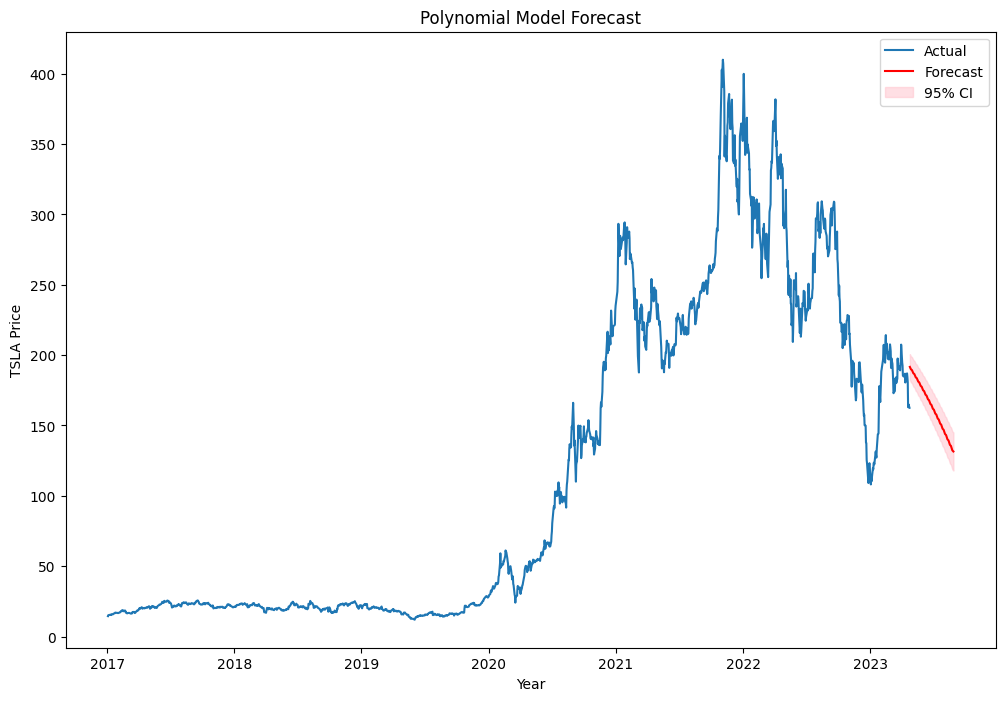

In [ ]:
# Define the target variable and features
y = df.values
X = np.arange(len(df)).reshape(-1, 1)

# Fit the polynomial model
degree = 3
poly_features = PolynomialFeatures(degree=degree).fit_transform(X)
model_poly = sm.OLS(y, poly_features).fit()

# Get the prediction and prediction intervals for the next h steps
h = 90
X_pred = PolynomialFeatures(degree=degree).fit_transform(np.arange(len(df), len(df) + h).reshape(-1, 1))
y_pred = model_poly.predict(X_pred)
forecast = pd.DataFrame({'Adj Close': y_pred})
forecast.index = pd.date_range(df.index[-1], periods=h+1, freq='B')[1:]
forecast_ci = model_poly.get_prediction(X_pred).conf_int(alpha=0.05)

# Plot the actual values and forecast
plt.figure(figsize=(12,8))
plt.plot(df, label='Actual')
plt.plot(forecast, color='r', label='Forecast')

# Plot the prediction intervals
forecast_ci = pd.DataFrame(forecast_ci, index=pd.date_range(df.index[-1], periods=h+1, freq='B')[1:])
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5, label='95% CI')

# Add titles and legends
plt.legend()
plt.title('Polynomial Model Forecast')
plt.xlabel('Year')
plt.ylabel('TSLA Price')
plt.show()

The test results show that the null hypothesis of no autocorrelation in the residuals is rejected for all lags from 1 to 20, with p-values less than 0.05. This indicates that there is still some significant autocorrelation left in the residuals after removing the trend and seasonality. Therefore, a model with a more complex structure or additional variables may be necessary to capture this remaining autocorrelation.